In [45]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
from pandas import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
import itertools
import warnings

In [46]:
#reading the dataset
data = pd.read_csv(r"C:\Users\Manik325\Desktop\Thesis Data\Thessis Dataset\USA_latest\us_states_covid19_daily.csv")

In [47]:
df = data.groupby("date")["positive", "death", "recovered"].sum().reset_index()
df

,date,positive,death,recovered
0,20200122,2.0,0.0,0.0
1,20200123,2.0,0.0,0.0
2,20200124,2.0,0.0,0.0
3,20200125,2.0,0.0,0.0
4,20200126,2.0,0.0,0.0
5,20200127,2.0,0.0,0.0
6,20200128,2.0,0.0,0.0
7,20200129,3.0,0.0,0.0
8,20200130,3.0,0.0,0.0
9,20200131,3.0,0.0,0.0


In [48]:
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
df["date"]

0     2020-01-22
1     2020-01-23
2     2020-01-24
3     2020-01-25
4     2020-01-26
5     2020-01-27
6     2020-01-28
7     2020-01-29
8     2020-01-30
9     2020-01-31
10    2020-02-01
11    2020-02-02
12    2020-02-03
13    2020-02-04
14    2020-02-05
15    2020-02-06
16    2020-02-07
17    2020-02-08
18    2020-02-09
19    2020-02-10
20    2020-02-11
21    2020-02-12
22    2020-02-13
23    2020-02-14
24    2020-02-15
25    2020-02-16
26    2020-02-17
27    2020-02-18
28    2020-02-19
29    2020-02-20
         ...    
174   2020-07-14
175   2020-07-15
176   2020-07-16
177   2020-07-17
178   2020-07-18
179   2020-07-19
180   2020-07-20
181   2020-07-21
182   2020-07-22
183   2020-07-23
184   2020-07-24
185   2020-07-25
186   2020-07-26
187   2020-07-27
188   2020-07-28
189   2020-07-29
190   2020-07-30
191   2020-07-31
192   2020-08-01
193   2020-08-02
194   2020-08-03
195   2020-08-04
196   2020-08-05
197   2020-08-06
198   2020-08-07
199   2020-08-08
200   2020-08-09
201   2020-08-

In [49]:
Confirmed_Cases = df[["date","positive"]]

In [51]:
Confirmed_Cases.set_index('date', inplace=True)

In [52]:
Confirmed_Cases.head()

,positive
date,
2020-01-22,2.0
2020-01-23,2.0
2020-01-24,2.0
2020-01-25,2.0
2020-01-26,2.0


In [53]:
# 95% for train
X_Confirmed = Confirmed_Cases.values[:194]

In [54]:
X_Confirmed

array([[2.000000e+00],
       [2.000000e+00],
       [2.000000e+00],
       [2.000000e+00],
       [2.000000e+00],
       [2.000000e+00],
       [2.000000e+00],
       [3.000000e+00],
       [3.000000e+00],
       [3.000000e+00],
       [4.000000e+00],
       [6.000000e+00],
       [7.000000e+00],
       [8.000000e+00],
       [8.000000e+00],
       [1.100000e+01],
       [1.200000e+01],
       [1.300000e+01],
       [1.300000e+01],
       [1.600000e+01],
       [1.700000e+01],
       [1.800000e+01],
       [1.800000e+01],
       [2.100000e+01],
       [2.800000e+01],
       [3.500000e+01],
       [5.000000e+01],
       [5.900000e+01],
       [6.900000e+01],
       [8.200000e+01],
       [9.300000e+01],
       [1.060000e+02],
       [1.220000e+02],
       [1.480000e+02],
       [1.790000e+02],
       [2.080000e+02],
       [2.350000e+02],
       [2.750000e+02],
       [2.990000e+02],
       [3.880000e+02],
       [4.700000e+02],
       [5.700000e+02],
       [7.570000e+02],
       [9.1

In [55]:
# 5% for test
X_Test = Confirmed_Cases.values[194:]
X_Test

array([[4694126.],
       [4745694.],
       [4797959.],
       [4852143.],
       [4913663.],
       [4967754.],
       [5019073.],
       [5060880.],
       [5116474.],
       [5172509.]])

In [56]:
prediction_confirmed = []

In [57]:
p=d=q=range(0,10)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 0, 9),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 2, 9),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 3, 9),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 4, 9),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 5, 9),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 6, 8),
 (0, 6, 9),
 (0, 7, 0),
 (0, 7, 1),
 (0, 7, 2),
 (0, 7, 3),
 (0, 7, 4),
 (0, 7, 5),
 (0, 7, 6),
 (0, 7, 7),
 (0, 7, 8),
 (0, 7, 9),
 (0, 8, 0),
 (0, 8, 1),
 (0, 8, 2),
 (0,

In [153]:
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(X_Confirmed,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 6027.8052142671
(0, 0, 1) 5769.755460282155
(0, 0, 2) 5516.704919139463
(0, 0, 3) 5276.6090975572915
(0, 0, 4) 5060.292169042836
(0, 0, 5) 4882.563116205836
(0, 0, 6) 4720.838736605993
(0, 0, 7) 4600.069056572268
(0, 0, 8) 4486.717027104237
(0, 0, 9) 4416.919594924083
(0, 1, 0) 4393.701740070008
(0, 1, 1) 4164.936674251135
(0, 1, 5) 3790.8440049454102
(0, 1, 6) 3768.0762701487383
(0, 2, 0) 3673.8807749559387
(0, 2, 1) 3671.3614398032605
(0, 2, 2) 3672.808945752625
(0, 2, 3) 3661.0705564620775
(0, 2, 4) 3658.286132889816
(0, 2, 5) 3655.987694223031
(0, 2, 6) 3631.6918675963393
(0, 2, 7) 3609.8150959800564
(0, 2, 8) 3610.633954372983
(0, 2, 9) 3612.3263831349227
(1, 0, 0) 4602.187982872655
(1, 1, 0) 3699.170985627268
(1, 1, 1) 3695.3361619197435
(1, 1, 2) 3697.164270154404
(1, 1, 3) 3688.5834785952143
(1, 1, 4) 3685.7707202557917
(1, 1, 5) 3672.052039300667
(1, 1, 6) 3658.743079850402
(1, 1, 7) 3645.56285535234
(1, 1, 8) 3644.415991098085
(1, 1, 9) 3635.898527915435
(1, 2, 0) 3

In [58]:
model_arima = ARIMA(X_Confirmed,order=(7, 2, 1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

3549.4077013677133


In [59]:
prediction_confirmed = model_arima_fit.forecast(steps=40)[0]
prediction_confirmed

array([4690581.00374555, 4740050.41337669, 4797791.19591519,
       4859601.91738096, 4919542.44590526, 4971610.05786892,
       5014244.86964386, 5054552.51451188, 5098964.17457962,
       5150855.41433182, 5207011.01476973, 5261066.2931884 ,
       5307513.8891167 , 5346136.61583642, 5382838.71797082,
       5423871.77423255, 5471947.54172848, 5524015.21596768,
       5573839.5668469 , 5616562.38015351, 5652527.517992  ,
       5687071.6121232 , 5726033.1651951 , 5771638.09994239,
       5820828.05362157, 5867697.31384401, 5907984.86397422,
       5942342.47971672, 5975758.21583963, 6013601.16625325,
       6057673.06841089, 6104902.27136404, 6149768.80251211,
       6188537.92720808, 6222077.103824  , 6255100.21929713,
       6292505.16022717, 6335714.48243719, 6381669.00400123,
       6425238.76793747])

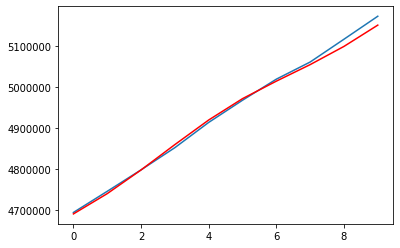

In [60]:
plt.plot(X_Test)
plt.plot(prediction_confirmed[:10],color='red')

In [61]:
# MAE Confirmed Cases
mean_absolute_error(X_Test, prediction_confirmed[:10])

7686.983505055122

In [62]:
# MSE Confirmed Cases
mse_confirmed = mean_squared_error(X_Test, prediction_confirmed[:10])
mse_confirmed

98833741.54470842

In [63]:
# RMSE Confirmed Cases
rmse_confirmed = sqrt(mse_confirmed)
rmse_confirmed

9941.516058665722

## Recovered Cases Prediction


In [19]:
Recovered_Cases = df[["date","recovered"]]

In [20]:
Recovered_Cases.set_index('date', inplace=True)

In [21]:
Recovered_Cases.head()

,recovered
date,
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0


In [22]:
# 95% for train
X_Recovered = Recovered_Cases.values[:194]

In [23]:
# 5% for test
X_Recovered_Test = Recovered_Cases.values[194:]
X_Recovered_Test

array([[1513446.],
       [1528979.],
       [1577851.],
       [1598624.],
       [1623870.],
       [1643142.],
       [1656888.],
       [1670755.],
       [1714960.],
       [1755225.]])

In [24]:
prediction_recovered = []

In [181]:
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima_recovered = ARIMA(X_Recovered,order=param)
        model_arima_fit_recovered = model_arima_recovered.fit()
        print(param,model_arima_fit_recovered.aic)
    except:
        continue

(0, 0, 0) 5588.199483313736
(0, 0, 1) 5333.016431237549
(0, 0, 2) 5097.779252028192
(0, 0, 3) 4971.936569508407
(0, 0, 4) 4854.462118181152
(0, 0, 5) 4730.773061197767
(0, 0, 6) 4649.764067529213
(0, 0, 7) 4569.5396929497365
(0, 0, 8) 4518.022983504968
(0, 0, 9) 4463.437882362509
(0, 1, 0) 4134.008998298577
(0, 1, 1) 4113.712536274042
(0, 1, 2) 4107.499448714968
(0, 1, 3) 4085.5245811076916
(0, 1, 4) 4086.726148232577
(0, 1, 5) 4088.722096737172
(0, 1, 6) 4056.0256463712617
(0, 1, 7) 4052.149630286135
(0, 1, 8) 4054.076837237283
(0, 1, 9) 4048.7866593445638
(0, 2, 0) 4146.3356499991705
(0, 2, 1) 4015.948725796466
(0, 2, 2) 4015.3683342680056
(0, 2, 3) 4016.0470979257193
(0, 2, 4) 4017.6657356694604
(0, 2, 5) 4018.30631361407
(0, 2, 6) 4019.7751888502753
(0, 2, 7) 3999.0833795485573
(0, 2, 8) 3999.9498760400224
(0, 2, 9) 4001.4073212395024
(1, 0, 0) 4244.7466517091625
(1, 1, 0) 4101.37041592618
(1, 1, 1) 4042.7605321337974
(1, 1, 2) 4042.1849311930314
(1, 1, 3) 4039.960580049044
(1, 1, 

In [25]:
model_arima_recovered = ARIMA(X_Recovered,order=(2, 2, 9))
model_arima_fit_recovered = model_arima_recovered.fit()
print(model_arima_fit_recovered.aic)

3998.663912871299


C:\Users\Manik325\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [26]:
prediction_recovered = model_arima_fit_recovered.forecast(steps=40)[0]
prediction_recovered

array([1493909.93226103, 1517624.27940559, 1536455.28144632,
       1557617.26717747, 1579014.28634703, 1594694.23288623,
       1614332.95511913, 1635823.09418442, 1655875.88544068,
       1676654.35108634, 1698107.73812106, 1718411.47472616,
       1740081.04486809, 1761306.73072341, 1782337.65479969,
       1804420.48285675, 1825648.76822458, 1847513.24055783,
       1869663.69594127, 1891269.57796145, 1913762.2640732 ,
       1935930.19848356, 1958161.32479006, 1980990.72494228,
       2003354.15554328, 2026224.58506909, 2049215.83931385,
       2071999.27707176, 2095358.00553796, 2118519.10649108,
       2141843.90187631, 2165519.5855633 , 2188976.36908315,
       2212822.07800394, 2236732.25984776, 2260614.29428024,
       2284877.61456809, 2309048.7870302 , 2333410.61410401,
       2357994.48961445])

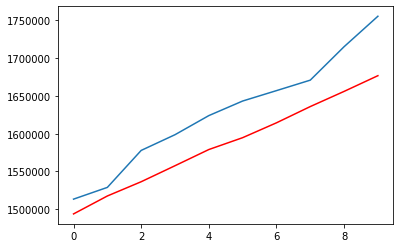

In [27]:
plt.plot(X_Recovered_Test)
plt.plot(prediction_recovered[:10],color='red')

In [28]:
# MAE Recovered Cases
mean_absolute_error(X_Recovered_Test, prediction_recovered[:10])

42173.843464575264

In [29]:
# MSE Recovered Cases
mse_recovered = mean_squared_error(X_Recovered_Test, prediction_recovered[:10])
mse_recovered

2096041581.2152882

In [30]:
# RMSE Confirmed Cases
rmse_recovered = sqrt(mse_recovered)
rmse_recovered

45782.546687742135

## Death Cases Prediction

In [31]:
Death_Cases = df[["date","death"]]

In [32]:
Death_Cases.set_index('date', inplace=True)

In [33]:
Death_Cases.head()

,death
date,
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0


In [34]:
# 95% for train
X_Death = Death_Cases.values[:194]

In [35]:
# 5% for test
X_Death_Test = Death_Cases.values[194:]
X_Death_Test

array([[147631.],
       [148807.],
       [150232.],
       [151483.],
       [152816.],
       [153905.],
       [154521.],
       [154947.],
       [156273.],
       [157776.]])

In [36]:
prediction_death = []

In [209]:
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima_death = ARIMA(X_Death,order=param)
        model_arima_fit_death = model_arima_death.fit()
        print(param,model_arima_fit_death.aic)
    except:
        continue

(0, 0, 0) 4779.969665710905
(0, 0, 1) 4520.346074854291
(0, 1, 0) 3089.0502471307695
(0, 1, 1) 2921.4824973484515
(0, 1, 2) 2816.0382831760808
(0, 1, 3) 2798.2513152310435
(0, 1, 4) 2746.3345049761692
(0, 1, 5) 2725.3982117742426
(0, 1, 6) 2726.799514345643
(0, 1, 7) 2746.5250298319606
(0, 2, 0) 2700.4400269143407
(0, 2, 1) 2702.362911109523
(0, 2, 2) 2690.2537482591847
(0, 2, 3) 2678.9700772956026
(0, 2, 4) 2679.6604986620246
(0, 2, 5) 2684.3511435024016
(0, 2, 6) 2649.040033041902
(0, 2, 7) 2626.6688401495676
(0, 2, 8) 2628.5742432318116
(0, 2, 9) 2617.010332878251
(1, 0, 0) 3262.6155447565716
(1, 1, 0) 2711.0087288864543
(1, 1, 1) 2712.9302623473313
(1, 1, 2) 2706.478904399262
(1, 1, 3) 2695.295948378063
(1, 1, 4) 2696.058274899356
(1, 1, 5) 2665.1144535931185
(1, 1, 6) 2664.5524489653126
(1, 2, 0) 2702.380556199877
(1, 2, 1) 2689.329126491117
(1, 2, 2) 2685.8395994154016
(1, 2, 3) 2678.9189821830787
(1, 2, 5) 2651.4946305212275
(2, 0, 0) 2741.9033316797377
(2, 0, 1) 2743.7648873029

In [37]:
model_arima_death = ARIMA(X_Death,order=(7, 2, 4))
model_arima_fit_death = model_arima_death.fit()
print(model_arima_fit_death.aic)

2567.8438819759103


In [38]:
prediction_death = model_arima_fit_death.forecast(steps=40)[0]
prediction_death

array([147982.83428857, 149158.5475758 , 150515.33031513, 151790.72412745,
       153047.3176645 , 154110.49057524, 154753.94872813, 155527.82552935,
       156671.73926679, 157907.06995206, 159123.42613127, 160377.75418464,
       161434.71490286, 162158.79790235, 162961.81347215, 164070.99203111,
       165255.23632158, 166448.10821162, 167705.63653994, 168791.1667254 ,
       169592.14106593, 170449.69475612, 171549.19170093, 172709.48393884,
       173898.79394613, 175164.95550261, 176286.43636296, 177163.5511709 ,
       178081.44833284, 179187.90722776, 180341.25976994, 181537.03780684,
       182815.14051693, 183972.9657481 , 184922.50656913, 185901.02129376,
       187024.61164349, 188182.74495933, 189390.98202287, 190682.84841789])

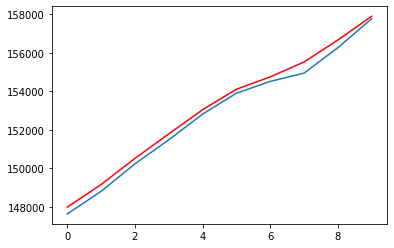

In [39]:
plt.plot(X_Death_Test)
plt.plot(prediction_death[:10],color='red')

In [40]:
# MAE Death Cases
mean_absolute_error(X_Death_Test, prediction_death[:10])

307.4828023030306

In [41]:
# MSE Recovered Cases
mse_death = mean_squared_error(X_Death_Test, prediction_death[:10])
mse_death

108587.3249873003

In [42]:
# RMSE Confirmed Cases
rmse_death = sqrt(mse_death)
rmse_death

329.5259094324759